In [49]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pylab as pl
from IPython import display
import time
from matplotlib import animation
from mpl_toolkits import mplot3d
%matplotlib inline
plt.style.use('ggplot')
from pylab import figure, subplot, hist, xlim, show
import psycopg2


In [50]:
def extractWordCounInContrib( groupData ):
    group = groupData 
    group1_1 = pd.DataFrame(group['message'])
    group1M_List=group1_1['message'].tolist()

    wordCount = []
    for x in group1M_List:
        if (pd.isnull(x )):
            text=0
        else:
            x = str(x)
            text = len(x.split())
        
        wordCount.append(text) 

   
    group["Word Count"]= wordCount 

    return group

In [51]:
def getDataFromDatabase(groupName):
    conn = psycopg2.connect(database="dcr579jl1mh56g", user = "tcuceyhvgqlejy", password = "2c8288a367bdc38450e89d9fc17b8f1319fac07c140f6bbb5f5339ee7ff984d5", host = "ec2-54-83-22-244.compute-1.amazonaws.com", port = "5432")

    #print "Opened database successfully"

    cur = conn.cursor()

    cur.execute("SELECT * from "+groupName)
    df = pd.DataFrame(cur.fetchall())
    df.columns = ['id', 'message', 'time', 'username']
    #df.columns = cur.keys()
    #rows = cur.fetchall()
    #print "Operation done successfully";
    conn.close()
    
    df2 = extractWordCounInContrib(df)
    return df2


In [52]:
group1_1 = getDataFromDatabase("s4group3")
group2_1 = getDataFromDatabase("s4group4")
group3_1 = getDataFromDatabase("s4group5")
group4_1 = getDataFromDatabase("s4group6")
group5_1 = getDataFromDatabase("s4group7")
group6_1 = getDataFromDatabase("s4group8")
group7_1 = getDataFromDatabase("s4group9")
group8_1 = getDataFromDatabase("s4group10")
group9_1 = getDataFromDatabase("s4group12")
group10_1 = getDataFromDatabase("s4group15")

In [53]:
def memcontrib(group, memList):
    #for a group of 4 members
    #We capture contribution of each of the members
    g_m1=group.loc[group['username'] == memList[0]]
    g_m2=group.loc[group['username'] == memList[1]]
    g_m3=group.loc[group['username'] == memList[2]]
    g_m4=group.loc[group['username'] == memList[3]]
    
    m1 =[]
    m2 =[]
    m3 =[]
    m4 =[]
    
    for index, row in g_m1.iterrows():
        count = len(row['message'].split())
        m1.append(count) 
        
    for index, row in g_m2.iterrows():
        count = len(row['message'].split())
        m2.append(count) 
    
    for index, row in g_m3.iterrows():
        count = len(row['message'].split())
        m3.append(count) 
        
    for index, row in g_m4.iterrows():
        count = len(row['message'].split())
        m4.append(count) 
    
    mc1 = sum(m1)
    mc2 = sum(m2)
    mc3 = sum(m3)
    mc4 = sum(m4)
    mcList=[mc1, mc2, mc3, mc4]
    
    return mcList


In [54]:
fig = plt.figure()
def plotPaticipationLevel(group,memList, gName):
        
        x = memList
        x_pos = [j for j, _ in enumerate(group)]
        
        N = 4
        ind = np.arange(N) 
        width = 0.4  
        

        #lt.subplot(2, 1, 1) 
        barList= plt.bar(x_pos, group)
        barList[0].set_color('#0000FF')
        barList[1].set_color('#0000FF')
        barList[2].set_color('#0000FF')
        barList[3].set_color('#0000FF') 
        
        
        plt.ylabel("Participation level")
        #plt.title("Between-groups measure of colabo. &\n Within-group measure of contrib.")
        plt.xticks(x_pos, x, rotation='vertical')
        
        
        plt.savefig('C:/Users/User/Desktop/NewStudy/paticipationLevel'+gName+'.jpg')
        plt.legend(loc='best')
        
        plt.show()    
   




In [58]:
m1List = ['cls409','cls410', 'cls411',  'cls412']
m2List = ['cls413', 'cls414', 'cls415', 'cls416']
m3List = ['cls417','cls418', 'cls419', 'cls420']
m4List = ['cls421', 'cls422', 'cls423', 'cls424']
m5List = ['cls425','cls426', 'cls427',  'cls428']
m6List = ['cls429', 'cls430', 'cls431', 'cls432']
m7List = ['cls433','cls434', 'cls435', 'cls436']
m8List = ['cls437', 'cls438', 'cls439', 'cls440']
m9List = ['cls445','cls446', 'cls447', 'cls448']
m10List = ['cls457', 'cls458', 'cls459', 'cls460']

WG_Contrib1 = memcontrib(group1_1, m1List)
WG_Contrib2 = memcontrib(group2_1, m2List)
WG_Contrib3 = memcontrib(group3_1, m3List)
WG_Contrib4 = memcontrib(group4_1, m4List)
WG_Contrib5 = memcontrib(group5_1, m5List)
WG_Contrib6 = memcontrib(group6_1, m6List)
WG_Contrib7 = memcontrib(group7_1, m7List)
WG_Contrib8 = memcontrib(group8_1, m8List)
WG_Contrib9 = memcontrib(group9_1, m9List)
WG_Contrib10 = memcontrib(group10_1, m10List)



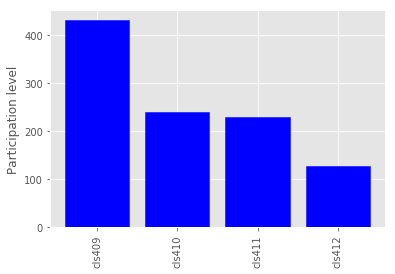

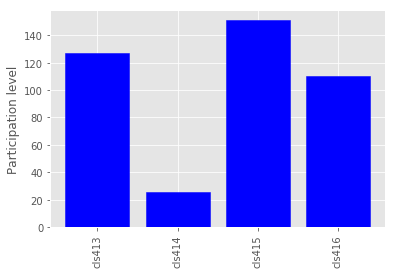

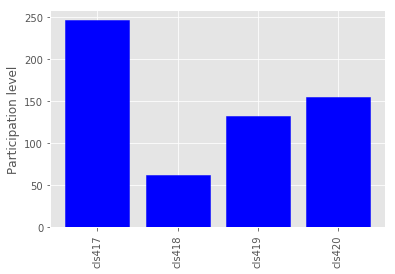

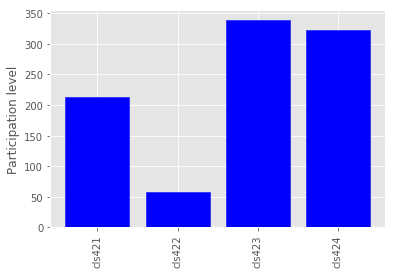

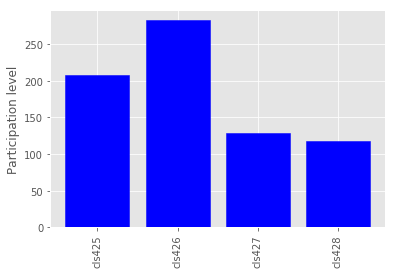

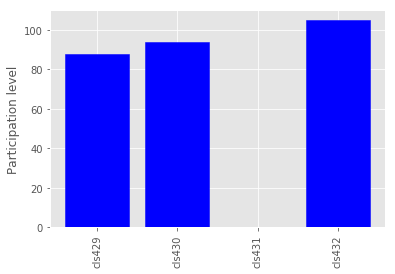

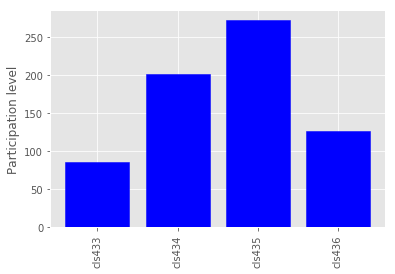

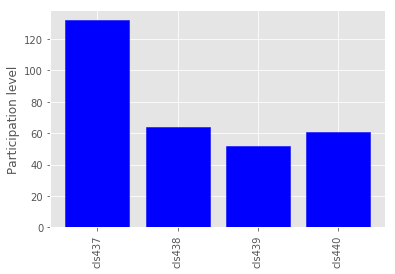

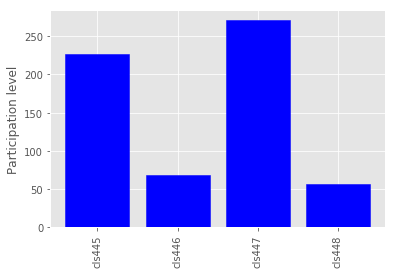

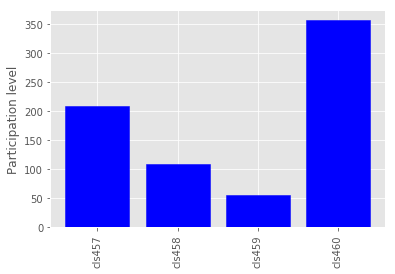

In [59]:
plotPaticipationLevel(WG_Contrib1,m1List, 'group1')
plotPaticipationLevel(WG_Contrib2,m2List, 'group2')
plotPaticipationLevel(WG_Contrib3,m3List, 'group3')
plotPaticipationLevel(WG_Contrib4,m4List, 'group4')
plotPaticipationLevel(WG_Contrib5,m5List, 'group5')
plotPaticipationLevel(WG_Contrib6,m6List, 'group6')
plotPaticipationLevel(WG_Contrib7,m7List, 'group7')
plotPaticipationLevel(WG_Contrib8,m8List, 'group8')
plotPaticipationLevel(WG_Contrib9,m9List, 'group9')
plotPaticipationLevel(WG_Contrib10,m10List, 'group10')


In [68]:
exptGroups={'grp1':WG_Contrib1, 'grp2':WG_Contrib3, 'grp3':WG_Contrib5, 'grp4':WG_Contrib7,'grp5':WG_Contrib8 }

contlGroups={'grp1':WG_Contrib2, 'grp2':WG_Contrib4, 'grp3':WG_Contrib6, 'grp4':WG_Contrib8,'grp5':WG_Contrib10}

exptData = pd.DataFrame(exptGroups)
contlData = pd.DataFrame(contlGroups)

exptData.to_csv("C:/Users/User/Desktop/NewStudy/participantData/exptData.csv")
contlData.to_csv("C:/Users/User/Desktop/NewStudy/participantData/contrl.csv")

print exptData
print contlData

   grp1  grp2  grp3  grp4  grp5
0   430   246   208    86   132
1   239    62   283   201    64
2   229   132   129   272    52
3   128   155   118   127    61
   grp1  grp2  grp3  grp4  grp5
0   127   213    88   132   209
1    26    57    94    64   109
2   151   339     0    52    55
3   110   322   105    61   356
